<a href="https://colab.research.google.com/github/ckj18/ToBigs_workspace/blob/main/Tobigs19_Dimensonality_Reduction_Week7_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [ ]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [ ]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [ ]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [ ]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

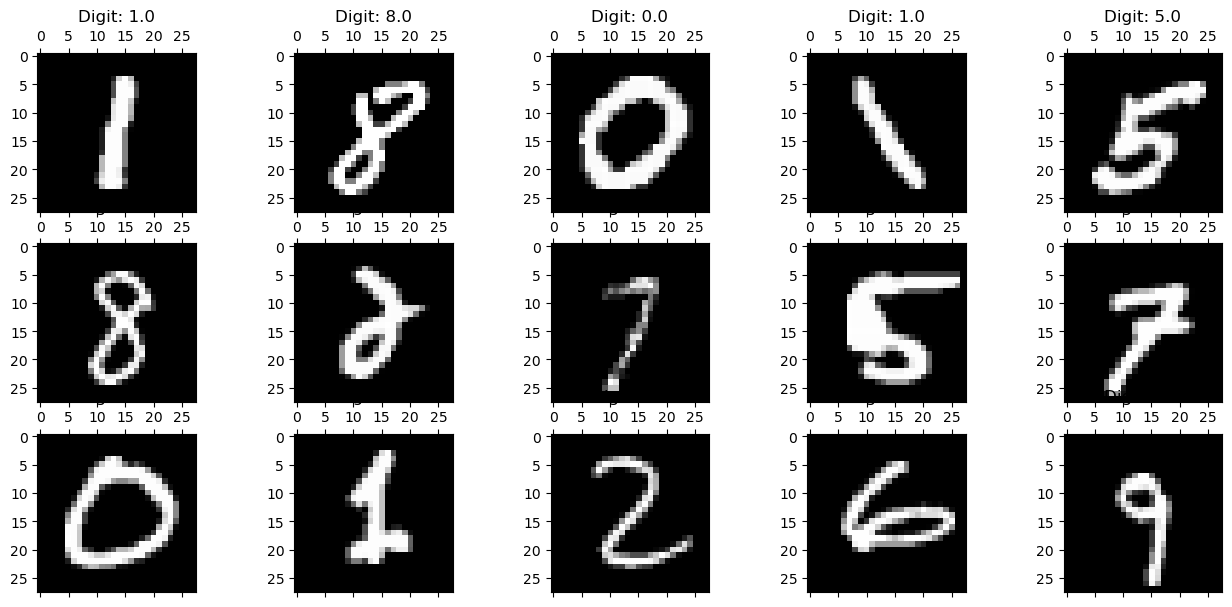

In [ ]:
# 데이터 형태 시각화
import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [ ]:
# 이미지 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# 1. Elbow point: 곡선의 기울기가 급격히 감소하는 지점
pca = PCA(n_components=X.shape[1], copy=False)
pca_X = pca.fit_transform(X_train)
ex_var = pca.explained_variance_

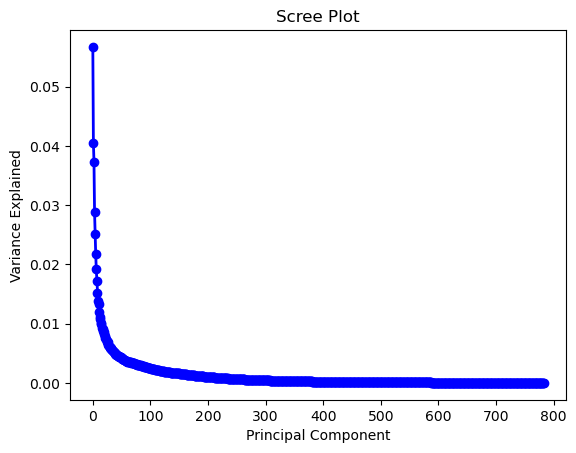

In [ ]:
PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# 변수들이 너무 많아 point를 찾기 어려움

In [ ]:
# 2. Kaiser's Rule: 고유값 1이상의 주성분들
ex_var[ex_var >= 1].shape

(166,)

In [ ]:
# 3. 누적설명률이 70 ~ 80%인 지점

# 70%
pca = PCA(n_components=0.7, copy=False)
pca_X = pca.fit_transform(X_train)
ex_var = pca.explained_variance_
print("누적설명률 70%일 때 고유값 개수: ", ex_var.shape)

# 80%
pca = PCA(n_components=0.8, copy=False)
pca_X = pca.fit_transform(X_train)
ex_var = pca.explained_variance_
print("누적설명률 80%일 때 고유값 개수: ", ex_var.shape)

# 고유값이 96~146개를 가질 때, 누적설명률 70~80%

누적설명률 70%일 때 고유값 개수:  (96,)
누적설명률 80%일 때 고유값 개수:  (146,)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
lda_X = LDA.fit_transform(X_train, y_train.reshape(-1))

LDA.explained_variance_ratio_
# 9개의 변수로 차원 축소

array([0.23752137, 0.20382862, 0.17676   , 0.10615576, 0.09420181,
       0.0702635 , 0.04998019, 0.03447225, 0.02681649])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
model_1 = SVC(random_state = 0, max_iter=1000)
model_2 = LogisticRegression(max_iter=1000, random_state=0) 
model_3 = RandomForestClassifier(random_state=0)

In [ ]:
def model_run(model, X_train, X_test):
    start = time.time()

    model.fit(X_train, y_train.reshape(-1,))
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)

    end = time.time()
    
    print("{} Test accuracy: {}\n Training time: {}\n".format(model, score, end-start))

In [ ]:
# SVM
model_run(model_1, X_train, X_test)

# Logistic Regression
model_run(model_2, X_train, X_test)

# Random Forest
model_run(model_3, X_train, X_test)

C:\Users\chlru\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000, random_state=0) Test accuracy: 0.9643571428571428
 Training time: 463.21328997612

LogisticRegression(max_iter=1000, random_state=0) Test accuracy: 0.9138571428571428
 Training time: 105.80547618865967

RandomForestClassifier(random_state=0) Test accuracy: 0.9693571428571428
 Training time: 35.397582054138184



In [ ]:
# PCA
pca = PCA(n_components=0.7, copy=False)
pca_X = pca.fit_transform(X_train)
pca_test = pca.transform(X_test) 

# SVM
model_run(model_1, pca_X, pca_test)

# Logistic Regression
model_run(model_2, pca_X, pca_test)

# Random Forest
model_run(model_3, pca_X, pca_test)

C:\Users\chlru\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000, random_state=0) Test accuracy: 0.9714285714285714
 Training time: 93.3457419872284

LogisticRegression(max_iter=1000, random_state=0) Test accuracy: 0.9149285714285714
 Training time: 41.13337755203247

RandomForestClassifier(random_state=0) Test accuracy: 0.9452142857142857
 Training time: 60.710543632507324



In [ ]:
# LDA
LDA = LinearDiscriminantAnalysis()
lda_X = LDA.fit_transform(X_train, y_train.reshape(-1))
lda_test = LDA.transform(X_test) 

# SVM
model_run(model_1, lda_X, lda_test)

# Logistic Regression
model_run(model_2, lda_X, lda_test)

# Random Forest
model_run(model_3, lda_X, lda_test)

C:\Users\chlru\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000, random_state=0) Test accuracy: 0.9162857142857143
 Training time: 37.106021881103516

LogisticRegression(max_iter=1000, random_state=0) Test accuracy: 0.8875
 Training time: 2.285521984100342

RandomForestClassifier(random_state=0) Test accuracy: 0.9122142857142858
 Training time: 24.26657724380493



### 결과 정리
    1) Non-차원축소: 학습시간이 오래 걸리며 평균 정확도: 94%
    2) PCA: 학습시간이 1)보다 많이 줄어들었으며 평균 정확도: 94%
    3) LDA: 학습시간이 2보다 줄어들었으며 평균 정확도: 90%
    4) 정리: 차원축소를 통해 학습시간을 단축할 수 있으며 PCA의 경우 차원축소를 하지 않았을 때와 정확도 차이가 별로 없지만, LDA는 차원이 많이 줄어들어 시간이 빠르지만 정확도가 낮아진 걸 확인할 수 있음

특정한 틀 없이 자유롭게 해주시면 됩니다!